# ABT-1
# Расчёт метрик математической статистики

Выполнила: Голикова Софья

1. [Распределение и его вид](#distribution)
2. [Описательные статистики](#descriptive_statistics)
    1. [Среднее арифметическое](#mean)
    2. [Медиана](#median)
    3. [Частота, с которой встречаются значения. Мода](#mode)
    4. [Размах](#range)
    5. [Межквартильный размах](#iqr)
    6. [Дисперсия](#variance)
    7. [Стандартное отклонение](#std)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

<a name="distribution"></a>
## Распределение и его вид

In [ ]:
np.random.seed()

# generate 1000 integer values in the range [5, 105)
random_values = np.random.randint(low=5, high=105, size=1000)

series = pd.Series(data=random_values)

Распределение сгенерированных случайным образом с помощью метода np.random.randint значений будет иметь вид **равномерного распределения (uniform distribution)**.

Равномерное распределение дискретной величины означает, что каждое из значений реализуется с одинаковой вероятностью. Именно на этом принципе и основана работа данной функции:

> Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high).

(из документации numpy)

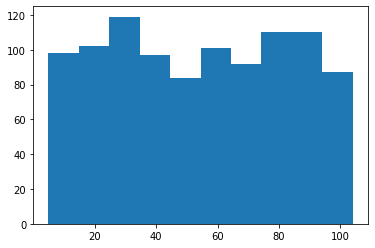

In [ ]:
plt.hist(series)
plt.show()

Как мы видим на графике, распределение действительно равномерное (с небольшими погрешностями).

Для того, чтобы распределение изменило форму, можно добавить к уже сгенерированным значениям значения из других диапазонов (очень большие или очень маленькие по сравнению с ними) - это будут выбросы (outliers).

In [ ]:
np.random.seed()

high_outliers = np.random.randint(low=-95, high=5, size=100)
low_outliers = np.random.randint(low=105, high=205, size=100)

distr_with_outliers = np.concatenate((random_values, high_outliers, low_outliers))
series_2 = pd.Series(data=distr_with_outliers)

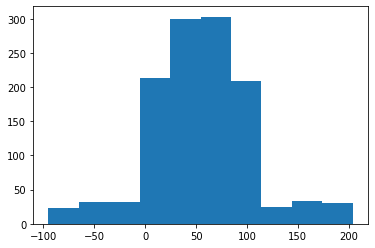

In [ ]:
plt.hist(series_2)
plt.show()

Кроме того, можно сгенерировать случайные значения для распределения определенного вида с помощью соответствующих функций библиотеки numpy, например:    
- np.random.randn - нормальное распределение
- np.random.binomial - биномиальное распределение 

и других.

In [ ]:
np.random.seed()

random_normal_values = np.random.randn(1000) * 100 + 5
series_normal = pd.Series(data=random_normal_values)

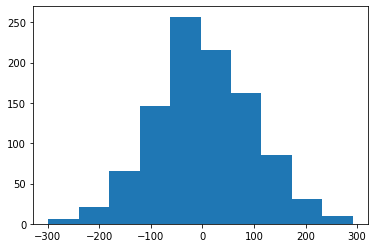

In [ ]:
plt.hist(series_normal)
plt.show()

<a name="descriptive_statistics"></a>
## Описательные статистики

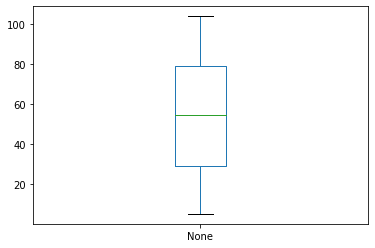

In [ ]:
series.plot.box()
plt.show()

<a name="mean"></a>
Математическое ожидание (среднее арифметическое)


![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/52a4490ec47192d3f77fbdf9bc8eddacdf2631f2)

In [ ]:
# расчет по формуле

def get_mean(series):
  
    n = len(series) # количество элементов
    s = sum(series) # сумма элементов

    return s / n 

mean_manually = get_mean(series)
print('Mean calculated manually:       {}'.format(mean_manually))


# расчет с использованием встроенного метода библиотеки pandas

mean_automatically = series.mean()
print('Mean calculated automatically:  {}'.format(mean_automatically))

Mean calculated manually:       53.92
Mean calculated automatically:  53.92


<a name="median"></a>
Медиана

> Медиана набора чисел — число, которое находится в середине этого набора, если его упорядочить по возрастанию, то есть такое число, что половина из элементов набора не меньше него, а другая половина не больше.

In [ ]:
# расчет по формуле

def get_median(series):

    n = len(series)                 # количество элементов
    sorted_series = np.sort(series) # упорядоченный набор

    # для нечетного количества элементов:
    # медиана - средний элемент упорядоченного набора;
    # для четного количества элементов: 
    # медиана - среднее арифметическое двух соседних средних элементов
    if (n % 2 == 0):
        median = (sorted_series[n // 2 - 1] + sorted_series[n // 2]) / 2
    else:
        median = sorted_series[n // 2]

    return median

median_manually = get_median(series)
print('Median calculated manually:       {}'.format(median_manually))


# расчет с использованием встроенного метода библиотеки pandas

median_automatically = series.median()
print('Median calculated automatically:  {}'.format(median_automatically))

Median calculated manually:       54.5
Median calculated automatically:  54.5


<a name="mode"></a>
Частота, с которой встречаются значения. Мода

> Мода — значение во множестве наблюдений, которое встречается наиболее часто. Иногда в совокупности встречается более чем одна мода. В этом случае можно сказать, что совокупность мультимодальна.

In [ ]:
def values_frequency(series):

    n = 100 # количество уникальных элементов
    
    # подсчет количества каждого значения в наборе
    # (в данном случае количество каждого значения в наборе
    # совпадает с относительной частотой в процентах, т.к. n = 100)
    values_dict = { a: 0 for a in range(5, 105) }
    for val in series:
        values_dict[val] += 1
    
    values = pd.Series(data=values_dict)

    return values

frequency = values_frequency(series)

print('value  frequency')
print(frequency)

value  frequency
5      13
6      11
7      10
8       7
9      17
       ..
100     6
101     9
102     8
103     6
104    13
Length: 100, dtype: int64


In [ ]:
# расчет по формуле

def get_mode(frequency_table):
    
    # нахождение максимальной частоты
    max_frequency = max(frequency_table.values)
    
    # нахождение значений с максимальной частотой
    modes = []
    for idx in frequency_table.index:
        if frequency_table[idx] == max_frequency:
            modes.append(idx)

    modes = pd.Series(modes)

    return modes

mode_manually = get_mode(frequency)
print('Mode calculated manually:')
print(mode_manually)
print()


# расчет с использованием встроенного метода библиотеки pandas

mode_automatically = series.mode()
print('Mode calculated automatically:')
print(mode_automatically)

Mode calculated manually:
0    32
dtype: int64

Mode calculated automatically:
0    32
dtype: int64


<a name="range"></a>
Размах

> Размах ряда чисел – это разность между наибольшим и наименьшим из этих чисел.

In [ ]:
# расчет по формуле

def get_range(series):

    return max(series) - min(series)

range_manually = get_range(series)
print('Range calculated manually:           {}'.format(range_manually))


# расчет с использованием встроенного метода библиотеки pandas

range_automatically = np.ptp(series)
print('Range calculated automatically:      {}'.format(range_automatically))

Range calculated manually:           99
Range calculated automatically:      99


<a name="iqr"></a>
Межквартильный размах

> Межквартильный размах — это разность между третьим и первым квартилями (25-м и 75-м процентилями).

In [ ]:
# расчет по формуле

def get_quantile(series, quantile):

    n = len(series)
    
    # расчет количества значений ниже заданного процентиля
    quantile_n = int(n * quantile)
    
    # упорядоченный набор
    sorted_series = np.sort(series)

    return sorted_series[quantile_n]

iqr_manually = get_quantile(series, 0.75) - get_quantile(series, 0.25)
print('Interquartile range calculated manually:        {}'.format(iqr_manually))


# расчет с использованием встроенного метода библиотеки pandas

iqr_automatically = series.quantile(q=0.75) - series.quantile(q=0.25)
print('Interquartile range calculated automatically:   {}'.format(iqr_automatically))

Interquartile range calculated manually:        50
Interquartile range calculated automatically:   50.0


<a name="variance"></a>
Дисперсия

Смещенная оценка:

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/88789b13f5fb63fe1bba4785fb722c9bf2969327)

Для несмещенной оценки вместо n в знаменателе n - 1

In [ ]:
# расчет по формуле

def get_variance(series):

    n = len(series)
    s = 0

    series_mean = get_mean(series)
    
    for val in series:
        s += (val - series_mean) ** 2

    return s / n, s / (n - 1)

variance_manually = get_variance(series)
print('Population variance calculated manually:        {}'.format(variance_manually[0]))
print('Sample variance calculated manually:            {}'.format(variance_manually[1]))
print()

# расчет с использованием встроенного метода библиотеки pandas

variance_automatically = series.var(ddof=0)
print('Population variance calculated automatically:   {}'.format(variance_automatically))
variance_automatically = series.var(ddof=1)
print('Sample variance calculated automatically:       {}'.format(variance_automatically))

Population variance calculated manually:        834.9755999999992
Sample variance calculated manually:            835.8114114114105

Population variance calculated automatically:   834.9755999999992
Sample variance calculated automatically:       835.8114114114105


<a name="std"></a>
Стандартное отклонение

Смещенная оценка:    

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/15619dfbb9a470d310c1bc08fb61d4fb1187d057)

Для несмещенной оценки вместо n в знаменателе n - 1

In [ ]:
# расчет по формуле

def get_std(series):

    series_variance = get_variance(series)

    return series_variance[0] ** (0.5), series_variance[1] ** (0.5)

std_manually = get_std(series)
print('Population standard deviation calculated manually:        {}'.format(std_manually[0]))
print('Sample standard deviation calculated manually:            {}'.format(std_manually[1]))
print()

# расчет с использованием встроенного метода библиотеки pandas

std_automatically = series.std(ddof=0)
print('Population standard deviation calculated automatically:   {}'.format(std_automatically))
std_automatically = series.std(ddof=1)
print('Sample standard deviation calculated automatically:       {}'.format(std_automatically))

Population standard deviation calculated manually:        28.89594435210587
Sample standard deviation calculated manually:            28.910403169298945

Population standard deviation calculated automatically:   28.89594435210587
Sample standard deviation calculated automatically:       28.910403169298945
